In [125]:
import numpy as np
import pandas as pd
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])


def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        W[0] -= (y_hat-y[i])*X[i][0]*learn_rate
        W[1] -= (y_hat-y[i])*X[i][1]*learn_rate
        b -= (y_hat-y[i])*learn_rate
  
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

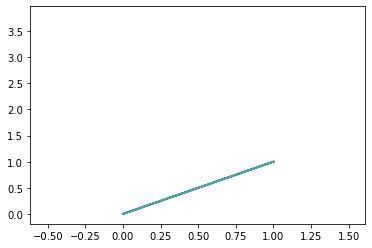

In [183]:
data = pd.read_csv("02-10-data.csv")
X = data.iloc[:,0:2].values
y = data.iloc[:,-1]
boundary_lines = trainPerceptronAlgorithm(X,y)

In [184]:
boundary_lines

[(array([2.3623342]), array([26.05454994])),
 (array([-0.59955068]), array([1.72396566])),
 (array([-0.70205715]), array([0.92400875])),
 (array([-0.71104917]), array([0.84034396])),
 (array([-0.71847131]), array([0.84548167])),
 (array([-0.72598477]), array([0.85068259])),
 (array([-0.72321002]), array([0.8818904])),
 (array([-0.73940033]), array([0.86088697])),
 (array([-0.74718265]), array([0.86627975])),
 (array([-0.75506309]), array([0.87174052])),
 (array([-0.7540387]), array([0.8735089])),
 (array([-0.74768098]), array([0.87374555])),
 (array([-0.74131981]), array([0.87398232])),
 (array([-0.73495519]), array([0.87421922])),
 (array([-0.72858713]), array([0.87445625])),
 (array([-0.7222156]), array([0.87469341])),
 (array([-0.71584063]), array([0.8749307])),
 (array([-0.72167459]), array([0.88009194])),
 (array([-0.7382075]), array([0.85864875])),
 (array([-0.74614701]), array([0.86414142])),
 (array([-0.75418874]), array([0.86970482])),
 (array([-0.75314066]), array([0.87150675

[array(0.0084492), array([0.70354707])]

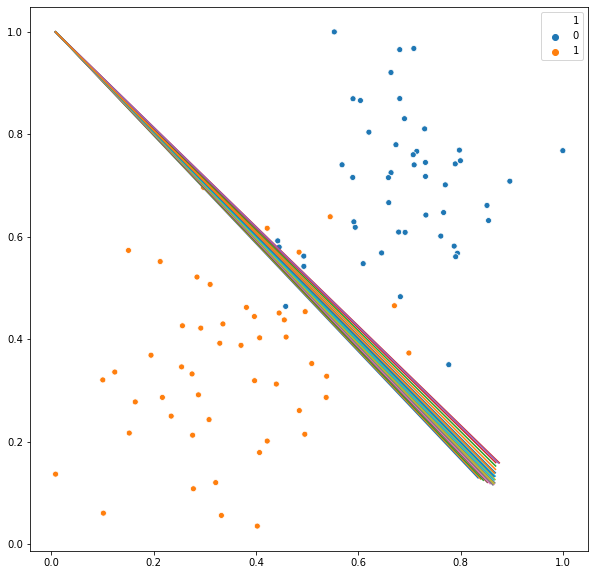

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:,0], y=X[:,1],hue=y)
for a in boundary_lines[3:]:
    plt.plot([np.array(min(X.T[0])),a[0]*np.array([min(X.T[0])])+a[1]], [np.array(max(X.T[0])),a[0]*np.array([max(X.T[0])])+a[1]])

In [126]:
perceptronStep(X, y, W, b, learn_rate = 0.01)

(array([[0.20717002],
        [0.52606838]]),
 -0.47750749794808084)